In [2]:
# ref 
# https://www.machinelearningplus.com/statistics/mahalanobis-distance/

In [4]:
#Load libraries
from sklearn.datasets import load_boston
import copy 
import numpy as np
import pandas as pd
import seaborn as sns
import scipy as sp
from scipy.stats import chi2
from sklearn.covariance import MinCovDet

import pandas as pd
import scipy as sp
import numpy as np

filepath = 'https://raw.githubusercontent.com/selva86/datasets/master/diamonds.csv'
df = pd.read_csv(filepath).iloc[:, [0,4,6]]
df.head()

,carat,depth,price
0,0.23,61.5,326
1,0.21,59.8,326
2,0.23,56.9,327
3,0.29,62.4,334
4,0.31,63.3,335


In [5]:
data_ = df[['carat', 'depth', 'price']]
cov = np.cov(data_.values.T,ddof=1)
inv_covmat = sp.linalg.inv(cov)

In [6]:
print(cov)
print(inv_covmat)

[[ 2.24686660e-01  1.91665282e-02  1.74276536e+03]
 [ 1.91665282e-02  2.05240384e+00 -6.08537121e+01]
 [ 1.74276536e+03 -6.08537121e+01  1.59156294e+07]]
[[ 2.98255446e+01 -3.75404629e-01 -3.26733989e-03]
 [-3.75404629e-01  4.92013886e-01  4.29881243e-05]
 [-3.26733989e-03  4.29881243e-05  4.20770213e-07]]


In [57]:
mcd = MinCovDet().fit(data_)

In [58]:
mcd.covariance_

array([[6.15560679e-02, 1.83686969e-02, 2.96178251e+02],
       [1.83686969e-02, 1.59492979e+00, 5.53378952e+01],
       [2.96178251e+02, 5.53378952e+01, 1.54847177e+06]])

In [59]:
inv_covmat =  sp.linalg.inv(mcd.covariance_)

In [60]:
inv_covmat

array([[ 2.05439108e+02, -1.00390186e+00, -3.92587344e-02],
       [-1.00390186e+00,  6.32670920e-01,  1.69407816e-04],
       [-3.92587344e-02,  1.69407816e-04,  8.14881414e-06]])

In [61]:
x = df[['carat', 'depth', 'price']].head(500)
data = df[['carat', 'depth', 'price']]

x_minus_mu = x - np.mean(data)
left_term = np.dot(x_minus_mu, inv_covmat)
mahal = np.dot(left_term, x_minus_mu.T)

#--
x['mahala']  = mahal
print(x)

ValueError: Expected a 1D array, got an array with shape (500, 500)

In [7]:
def mahalanobis(x=None, data=None, cov=None):
    """Compute the Mahalanobis Distance between each row of x and the data  
    x    : vector or matrix of data with, say, p columns.
    data : ndarray of the distribution from which Mahalanobis distance of each observation of x is to be computed.
    cov  : covariance matrix (p x p) of the distribution. If None, will be computed from data.
    """
    x_minus_mu = x - np.mean(data)
    if not cov:
        cov = np.cov(data.values.T)
    inv_covmat = sp.linalg.inv(cov)
    left_term = np.dot(x_minus_mu, inv_covmat)
    mahal = np.dot(left_term, x_minus_mu.T)
    return mahal.diagonal()

df_x = df[['carat', 'depth', 'price']].head(500)
df_x['mahala'] = mahalanobis(x=df_x, data=df[['carat', 'depth', 'price']])
df_x.head()

,carat,depth,price,mahala
0,0.23,61.5,326,5.239696e+07
1,0.21,59.8,326,5.239896e+07
2,0.23,56.9,327,5.239813e+07
3,0.29,62.4,334,5.239210e+07
4,0.31,63.3,335,5.239031e+07


In [26]:
# 5. How to compute Mahalanobis Distance in Python
# 계산코드 수정 필요. 아무래도 covariance 가 잘못 뽑히는 느낌인데.. ! 

def mahalanobis(x=None, data=None, cov=None):
    """Compute the Mahalanobis Distance between each row of x and the data  
    x    : vector or matrix of data with, say, p columns.
    data : ndarray of the distribution from which Mahalanobis distance of each observation of x is to be computed.
    cov  : covariance matrix (p x p) of the distribution. If None, will be computed from data.
    """
    #Minimum covariance determinant
    
    
    #cov = np.cov(data.values.T)    
    #rng = np.random.RandomState(0)
    #x = rng.multivariate_normal(mean=np.mean(df, axis=0), cov=cov, size=506)
    cov = MinCovDet(random_state=0).fit(data.values)
    mcd = cov.covariance_ #robust covariance metric
    inv_covmat = sp.linalg.inv(mcd)
    
    x_minus_mu = x - np.mean(data)
    left_term = np.dot(x_minus_mu, inv_covmat)
    mahal = np.dot(left_term, x_minus_mu.T)
    md = np.sqrt(mahal.diagonal())
    return md
    
    # rng = np.random.RandomState(0)
    # real_cov = np.cov(df.values.T)
    # X = rng.multivariate_normal(mean=np.mean(df, axis=0), cov=real_cov, size=506)
    # cov = MinCovDet(random_state=0).fit(X)
    # mcd = cov.covariance_ #robust covariance metric
    # robust_mean = cov.location_  #robust mean
    # inv_covmat = sp.linalg.inv(mcd) #inverse covariance metric
    
    # #Robust M-Distance
    # x_minus_mu = df - robust_mean
    # left_term = np.dot(x_minus_mu, inv_covmat)
    # mahal = np.dot(left_term, x_minus_mu.T)
    # md = np.sqrt(mahal.diagonal())
    
    # return md 


df_x = df[['carat', 'depth', 'price']].head(506)
df_x['mahala'] = mahalanobis(x=df_x, data=df[['carat', 'depth', 'price']])
df_x.head()

,carat,depth,price,mahala
0,0.23,61.5,326,19020.255677
1,0.21,59.8,326,19020.494355
2,0.23,56.9,327,19020.129883
3,0.29,62.4,334,19019.444014
4,0.31,63.3,335,19019.185743


In [10]:
# 6. Usecase 1: Multivariate outlier detection using Mahalanobis distance

# Assuming that the test statistic follows chi-square distributed with ‘n’ degree of freedom, the critical value at a 0.01 significance level and 2 degrees of freedom is computed as:
# Critical values for two degrees of freedom
from scipy.stats import chi2
chi2.ppf((1-0.01), df=2)
#> 9.21

9.21034037197618

In [11]:
# Compute the P-Values
df_x['p_value'] = 1 - chi2.cdf(df_x['mahala'], 2)

# Extreme values with a significance level of 0.01
df_x.loc[df_x.p_value < 0.01].head(10)

,carat,depth,price,mahala,p_value
0,0.23,61.5,326,5.239696e+07,0.0
1,0.21,59.8,326,5.239896e+07,0.0
2,0.23,56.9,327,5.239813e+07,0.0
3,0.29,62.4,334,5.239210e+07,0.0
4,0.31,63.3,335,5.239031e+07,0.0
5,0.24,62.8,336,5.239594e+07,0.0
6,0.24,62.3,336,5.239606e+07,0.0
7,0.26,61.9,337,5.239460e+07,0.0
8,0.22,65.1,337,5.239695e+07,0.0
9,0.23,59.4,338,5.239759e+07,0.0


In [16]:
#7. Usecase 2: Mahalanobis Distance for Classification Problems

df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BreastCancer.csv', 
                 usecols=['Cl.thickness', 'Cell.size', 'Marg.adhesion', 
                          'Epith.c.size', 'Bare.nuclei', 'Bl.cromatin', 'Normal.nucleoli', 
                          'Mitoses', 'Class'])

df.dropna(inplace=True)  # drop missing values.
df.head()

,Cl.thickness,Cell.size,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
0,5,1,1,2,1.0,3,1,1,0
1,5,4,5,7,10.0,3,2,1,0
2,3,1,1,2,2.0,3,1,1,0
3,6,8,1,3,4.0,3,7,1,0
4,4,1,3,2,1.0,3,1,1,0


In [17]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(df.drop('Class', axis=1), df['Class'], test_size=.3, random_state=100)

# Split the training data as pos and neg
xtrain_pos = xtrain.loc[ytrain == 1, :]
xtrain_neg = xtrain.loc[ytrain == 0, :]

In [18]:
class MahalanobisBinaryClassifier():
    def __init__(self, xtrain, ytrain):
        self.xtrain_pos = xtrain.loc[ytrain == 1, :]
        self.xtrain_neg = xtrain.loc[ytrain == 0, :]

    def predict_proba(self, xtest):
        pos_neg_dists = [(p,n) for p, n in zip(mahalanobis(xtest, self.xtrain_pos), mahalanobis(xtest, self.xtrain_neg))]
        return np.array([(1-n/(p+n), 1-p/(p+n)) for p,n in pos_neg_dists])

    def predict(self, xtest):
        return np.array([np.argmax(row) for row in self.predict_proba(xtest)])


clf = MahalanobisBinaryClassifier(xtrain, ytrain)        
pred_probs = clf.predict_proba(xtest)
pred_class = clf.predict(xtest)

# Pred and Truth
pred_actuals = pd.DataFrame([(pred, act) for pred, act in zip(pred_class, ytest)], columns=['pred', 'true'])
print(pred_actuals[:5])        

[[ 0.17744041 -0.00918643  0.02771295 -0.00106467  0.00250118  0.0062317
   0.00897083 -0.02249937]
 [-0.00918643  0.21368131 -0.03170535 -0.07922599  0.01335516 -0.06796955
  -0.01086835 -0.00328831]
 [ 0.02771295 -0.03170535  0.11748705  0.00059308 -0.02193534 -0.03019262
   0.00288361 -0.01997145]
 [-0.00106467 -0.07922599  0.00059308  0.23234442  0.01182632  0.0005974
  -0.01499568 -0.05246295]
 [ 0.00250118  0.01335516 -0.02193534  0.01182632  0.11084946 -0.02000894
   0.00569901 -0.00364199]
 [ 0.0062317  -0.06796955 -0.03019262  0.0005974  -0.02000894  0.24988235
  -0.03264873  0.01698308]
 [ 0.00897083 -0.01086835  0.00288361 -0.01499568  0.00569901 -0.03264873
   0.10353676 -0.01444254]
 [-0.02249937 -0.00328831 -0.01997145 -0.05246295 -0.00364199  0.01698308
  -0.01444254  0.17715793]]
[[ 4.00835759e-01 -1.75719667e-01 -1.29937585e-01  2.03807812e-02
   4.42606715e-02  7.10822431e-04 -7.25546132e-02  7.30548046e-02]
 [-1.75719667e-01  2.44411395e+00 -4.15994556e-01 -3.5442847

In [19]:
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, confusion_matrix
truth = pred_actuals.loc[:, 'true']
pred = pred_actuals.loc[:, 'pred']
scores = np.array(pred_probs)[:, 1]
print('AUROC: ', roc_auc_score(truth, scores))
print('\nConfusion Matrix: \n', confusion_matrix(truth, pred))
print('\nAccuracy Score: ', accuracy_score(truth, pred))
print('\nClassification Report: \n', classification_report(truth, pred))

AUROC:  0.9867692307692308

Confusion Matrix: 
 [[96 34]
 [ 0 75]]

Accuracy Score:  0.8341463414634146

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.74      0.85       130
           1       0.69      1.00      0.82        75

    accuracy                           0.83       205
   macro avg       0.84      0.87      0.83       205
weighted avg       0.89      0.83      0.84       205



In [20]:
# 아래는 블로그에서 측정한 값, mah 가 잘못측정되어서,, confusion matrix 가 다소 낮은 것으로 확인해 볼 수 있다 . 
# AUROC:  0.9909743589743589

# Confusion Matrix: 
#  [[113  17]
#  [  0  75]]

# Accuracy Score:  0.9170731707317074

# Classification Report: 
#               precision    recall  f1-score   support

#           0       1.00      0.87      0.93       130
#           1       0.82      1.00      0.90        75

# avg / total       0.93      0.92      0.92       205

In [21]:
# Mahalanobis distance alone is able to contribute to this much accuracy (92%).

In [1]:
import pandas as pd 
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BreastCancer.csv', 
                 usecols=['Cl.thickness', 'Cell.size', 'Marg.adhesion', 
                          'Epith.c.size', 'Bare.nuclei', 'Bl.cromatin', 'Normal.nucleoli', 
                          'Mitoses', 'Class'])

df.dropna(inplace=True)  # drop missing values.
df.head()

,Cl.thickness,Cell.size,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
0,5,1,1,2,1.0,3,1,1,0
1,5,4,5,7,10.0,3,2,1,0
2,3,1,1,2,2.0,3,1,1,0
3,6,8,1,3,4.0,3,7,1,0
4,4,1,3,2,1.0,3,1,1,0


In [2]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(df.drop('Class', axis=1), df['Class'], test_size=.3, random_state=100)

# Split the training data as pos and neg
xtrain_pos = xtrain.loc[ytrain == 1, :]
xtrain_neg = xtrain.loc[ytrain == 0, :]

In [8]:
class MahalanobisBinaryClassifier():
    def __init__(self, xtrain, ytrain):
        self.xtrain_pos = xtrain.loc[ytrain == 1, :]
        self.xtrain_neg = xtrain.loc[ytrain == 0, :]

    def predict_proba(self, xtest):
        pos_neg_dists = [(p,n) for p, n in zip(mahalanobis(xtest, self.xtrain_pos), mahalanobis(xtest, self.xtrain_neg))]
        return np.array([(1-n/(p+n), 1-p/(p+n)) for p,n in pos_neg_dists])

    def predict(self, xtest):
        return np.array([np.argmax(row) for row in self.predict_proba(xtest)])


clf = MahalanobisBinaryClassifier(xtrain, ytrain)        
pred_probs = clf.predict_proba(xtest)
pred_class = clf.predict(xtest)

# Pred and Truth
pred_actuals = pd.DataFrame([(pred, act) for pred, act in zip(pred_class, ytest)], columns=['pred', 'true'])
print(pred_actuals[:5])      

   pred  true
0     1     0
1     1     1
2     0     0
3     1     0
4     0     0


In [9]:
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, confusion_matrix
truth = pred_actuals.loc[:, 'true']
pred = pred_actuals.loc[:, 'pred']
scores = np.array(pred_probs)[:, 1]
print('AUROC: ', roc_auc_score(truth, scores))
print('\nConfusion Matrix: \n', confusion_matrix(truth, pred))
print('\nAccuracy Score: ', accuracy_score(truth, pred))
print('\nClassification Report: \n', classification_report(truth, pred))

AUROC:  0.9867692307692308

Confusion Matrix: 
 [[96 34]
 [ 0 75]]

Accuracy Score:  0.8341463414634146

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.74      0.85       130
           1       0.69      1.00      0.82        75

    accuracy                           0.83       205
   macro avg       0.84      0.87      0.83       205
weighted avg       0.89      0.83      0.84       205



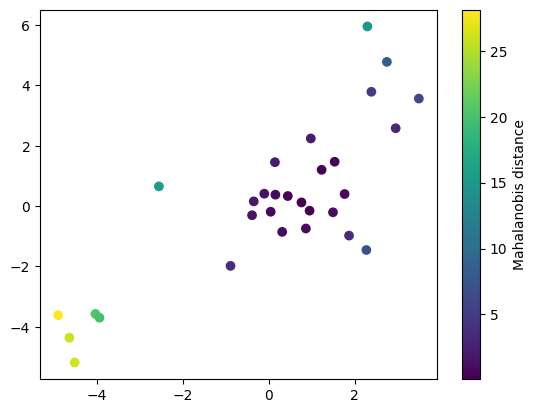

In [10]:
import numpy as np
from sklearn.covariance import MinCovDet

# Generate a toy dataset with outliers
np.random.seed(0)
X = np.vstack([np.random.normal(size=(20, 2)), 
               np.random.normal(loc=4, size=(5, 2)),
               np.random.normal(loc=-4, size=(5, 2))])

# Fit Minimum Covariance Determinant estimator
mcd = MinCovDet().fit(X)

# Compute robust covariance matrix and Mahalanobis distances
robust_cov = mcd.covariance_
mdist = mcd.mahalanobis(X)

# Plot the results
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c=mdist, cmap='viridis')
plt.colorbar(label='Mahalanobis distance')
plt.show()